In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from dhdrnet.util import ROOT_DIR, DATA_DIR
stats_dir = ROOT_DIR / "precomputed_data"
fig_dir = ROOT_DIR / "figures" / "ev_choices" / "ev_correct"
plt.rcParams['figure.figsize'] = (10,10)

In [6]:
# from dhdrnet.histogram_classifier import to_histogram

In [7]:
image_names = list(pd.read_csv(stats_dir / "test_current.csv")["names"])
sample_size = 15
name_sample = random.sample(image_names, sample_size)
name_sample

['33TJ_20150820_180101_954',
 'bee7_20150829_124655_015',
 '0039_20141008_183158_958',
 '0382_20150924_091012_318',
 '33TJ_20150810_162520_459',
 '0155_20160926_204415_055',
 '5066_20160721_161940_595',
 '4KK2_20150910_150520_647',
 '0039_20141010_164305_453',
 'bee7_20150818_162155_195',
 '0006_20160727_173428_814',
 '0043_20160826_181718_273',
 '4KK2_20150822_215204_476',
 '0830_20151107_170240_297',
 '0919_20150906_164918_075']

/home/shane/.cache/pypoetry/virtualenvs/dhdrnet-CxDQYEDG-py3.8/lib/python3.8/site-packages/colour/utilities/verbose.py:237: ColourWarning: "Adobe DNG Converter" is not available on your platform!
  warn(*args, **kwargs)


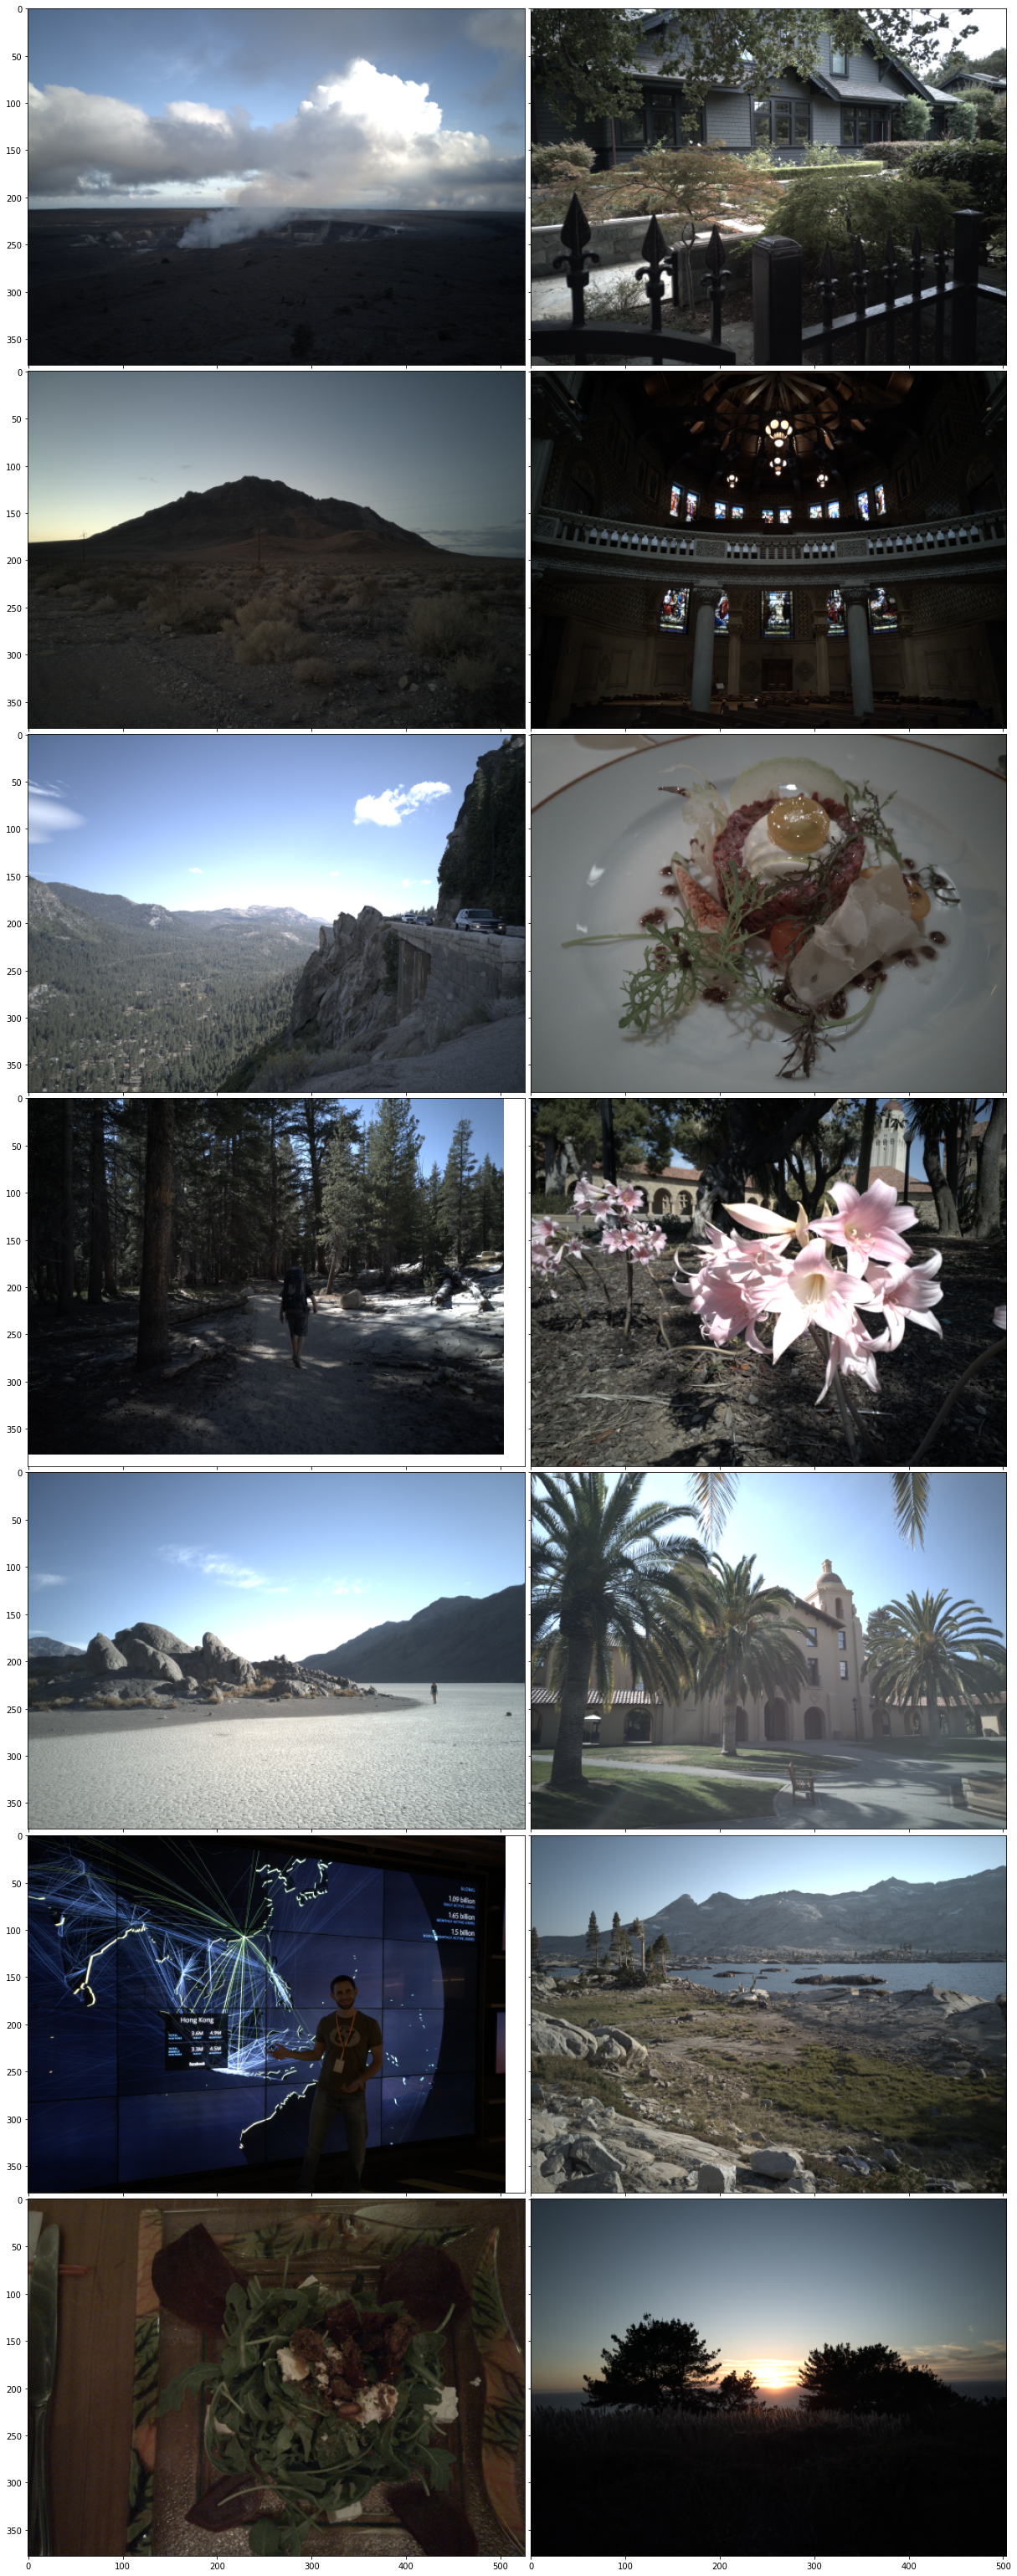

In [8]:
# using the data generator to get the proper images
from dhdrnet.gen_pairs import GenAllPairs
from more_itertools import one
from dhdrnet.vis_util import rgb_bgr_swap, show_image_grid

gen = GenAllPairs(
    raw_path=DATA_DIR/"dngs",
    out_path=DATA_DIR/"correct_exposures"/"exposures",
    store_path=None,
    compute_scores=False
)
sample_mid_exposures = [rgb_bgr_swap(one(gen.get_exposures(name, [0.0]))) for name in name_sample]
show_image_grid(sample_mid_exposures)

IndexError: list index out of range

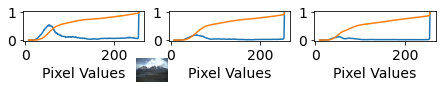

IndexError: list index out of range

In [13]:
from skimage import exposure
plt.rcParams.update({'font.size': 14})
ncols = 4
fig = plt.figure()
for i, image in enumerate(sample_mid_exposures):
    hist_axes = []
    for c, colour in enumerate(("red", "green", "blue", "src")):
        ind = ncols*i + c + 1
        if colour == "src":
            im_ax = fig.add_subplot(ncols, sample_size, ind)
            im_ax.imshow(image)
            im_ax.axis('off')
        else:
            hist, bins = exposure.histogram(image[..., c], nbins=100)
            prev_ax = hist_axes[i-1] if i >= 1 else None
            hist_axes.append(fig.add_subplot(sample_size, ncols, ind, sharex=prev_ax, sharey=prev_ax))
            hist_axes[c].plot(bins, hist / hist.max())
            image_cdf, bins = exposure.cumulative_distribution(image[..., c], nbins=100)
            hist_axes[c].plot(bins, image_cdf)
            hist_axes[c].set_xlabel("Pixel Values")

axes[0, 0].set_title("Red")
axes[0, 1].set_title("Green")
axes[0, 2].set_title("Blue")

plt.tight_layout()
plt.show()


In [9]:
import pytorch_lightning as pl
from dhdrnet.histogram_model import HistogramNet

model = HistogramNet(bins=100)
trainer = pl.Trainer(gpus=1)

trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]


/home/shane/Development/DHDRNet/data/correct_exposures/exposures


/home/shane/.cache/pypoetry/virtualenvs/dhdrnet-md5k9ngR-py3.8/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:37: UserWarning: Could not log computational graph since the `model.example_input_array` attribute is not set or `input_array` was not given
  warnings.warn(*args, **kwargs)

  | Name  | Type   | Params
---------------------------------
0 | model | Linear | 3 K   


/home/shane/Development/DHDRNet/data/correct_exposures/exposures


/home/shane/.cache/pypoetry/virtualenvs/dhdrnet-md5k9ngR-py3.8/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:37: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)
Saving latest checkpoint..


1